In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
X_train = np.load('/home/iotadmin/notebooks/array/flfy_feature_plus_input.npy')

In [16]:
Y_train = np.load('/home/iotadmin/notebooks/array/window_200_t_4.npy')

In [4]:
X_test = np.load('/home/iotadmin/notebooks/array/flfy_feature_plus.npy')

In [17]:
Y_test = np.load('/home/iotadmin/notebooks/array/test_window_200_t_4.npy')

In [18]:
Y_train = Y_train[0:192115]

In [19]:
Y_test = Y_test[0:360373]

In [9]:
X_test.shape

(360373, 200, 45)

In [19]:
Y_test = Y_test[0:360373]

In [20]:
from tensorflow.keras.layers import LSTM, RNN, Input, Dense,Conv1D,MaxPooling1D,Flatten,BatchNormalization,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional


step = 200
n_inputs = 45
n_hiddens = 64
n_outputs = 1
inputs = Input(shape=(step, n_inputs))
x = Conv1D(256, 10, activation='relu')(inputs)
x = MaxPooling1D(5)(x)
x = Flatten()(x)
x = Dense(32,activation='relu')(x)
output = Dense(n_outputs)(x)

model = Model(inputs,output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 45)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 191, 256)          115456    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9728)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                311328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 426,817
Trainable params: 426,817
Non-trainable params: 0
_______________________________________________________

In [21]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history = model.fit(X_train, Y_train, epochs= 200, batch_size=128)
model.save("home/iotadmin/notebooks/model/FLMX_CNN_feature_plus.h5")

Train on 192115 samples
Epoch 1/200
192115/192115 [==============================] - 11s 57us/sample - loss: 13927.2649 - mae: 76.1520
Epoch 2/200
192115/192115 [==============================] - 10s 53us/sample - loss: 6392.0597 - mae: 53.2952
Epoch 3/200
192115/192115 [==============================] - 10s 53us/sample - loss: 5549.8160 - mae: 49.2909
Epoch 4/200
192115/192115 [==============================] - 10s 54us/sample - loss: 5328.1877 - mae: 48.1861
Epoch 5/200
192115/192115 [==============================] - 10s 53us/sample - loss: 5202.4854 - mae: 47.4259
Epoch 6/200
192115/192115 [==============================] - 10s 53us/sample - loss: 5000.5696 - mae: 46.0698
Epoch 7/200
192115/192115 [==============================] - 10s 53us/sample - loss: 4888.8545 - mae: 45.4850
Epoch 8/200
192115/192115 [==============================] - 10s 53us/sample - loss: 4805.9858 - mae: 44.9423
Epoch 9/200
192115/192115 [==============================] - 10s 53us/sample - loss: 4709.0345 

192115/192115 [==============================] - 10s 53us/sample - loss: 3340.9979 - mae: 37.0242
Epoch 75/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3338.2858 - mae: 37.0063
Epoch 76/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3309.3748 - mae: 36.8411
Epoch 77/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3307.0750 - mae: 36.8066
Epoch 78/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3315.5047 - mae: 36.8231
Epoch 79/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3296.8467 - mae: 36.8532
Epoch 80/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3266.2946 - mae: 36.5934
Epoch 81/200
192115/192115 [==============================] - 10s 53us/sample - loss: 3301.0996 - mae: 36.9075
Epoch 82/200
192115/192115 [==============================] - 10s 54us/sample - loss: 3268.5186 - mae: 36.5845
Epoch 83/200
1

192115/192115 [==============================] - 10s 53us/sample - loss: 2852.8089 - mae: 34.4621
Epoch 148/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2865.5694 - mae: 34.6207
Epoch 149/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2855.2881 - mae: 34.4937
Epoch 150/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2869.4325 - mae: 34.5784
Epoch 151/200
192115/192115 [==============================] - 10s 54us/sample - loss: 2849.6988 - mae: 34.4297
Epoch 152/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2833.2494 - mae: 34.3910
Epoch 153/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2843.8259 - mae: 34.5428
Epoch 154/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2829.9623 - mae: 34.3350
Epoch 155/200
192115/192115 [==============================] - 10s 53us/sample - loss: 2826.2530 - mae: 34.3883
Epoch 

In [7]:
from tensorflow.keras.models import load_model
model = load_model("home/iotadmin/notebooks/model/FLFY_CNN_feature_plus.h5")

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)
Y_predict=Y_predict.reshape(Y_predict.shape[0],)
print(mean_squared_error(Y_test, Y_predict)**0.5)
print((np.corrcoef([Y_test,Y_predict])[0][1])**2)

165.98973216353303
0.3606630927099714


In [23]:
submit = pd.DataFrame({"FLFY":Y_test,"FLFY_pred":Y_predict})
submit.to_csv('/home/iotadmin/notebooks/csv/FLMX_CNN_feature_plus.csv', index = False)

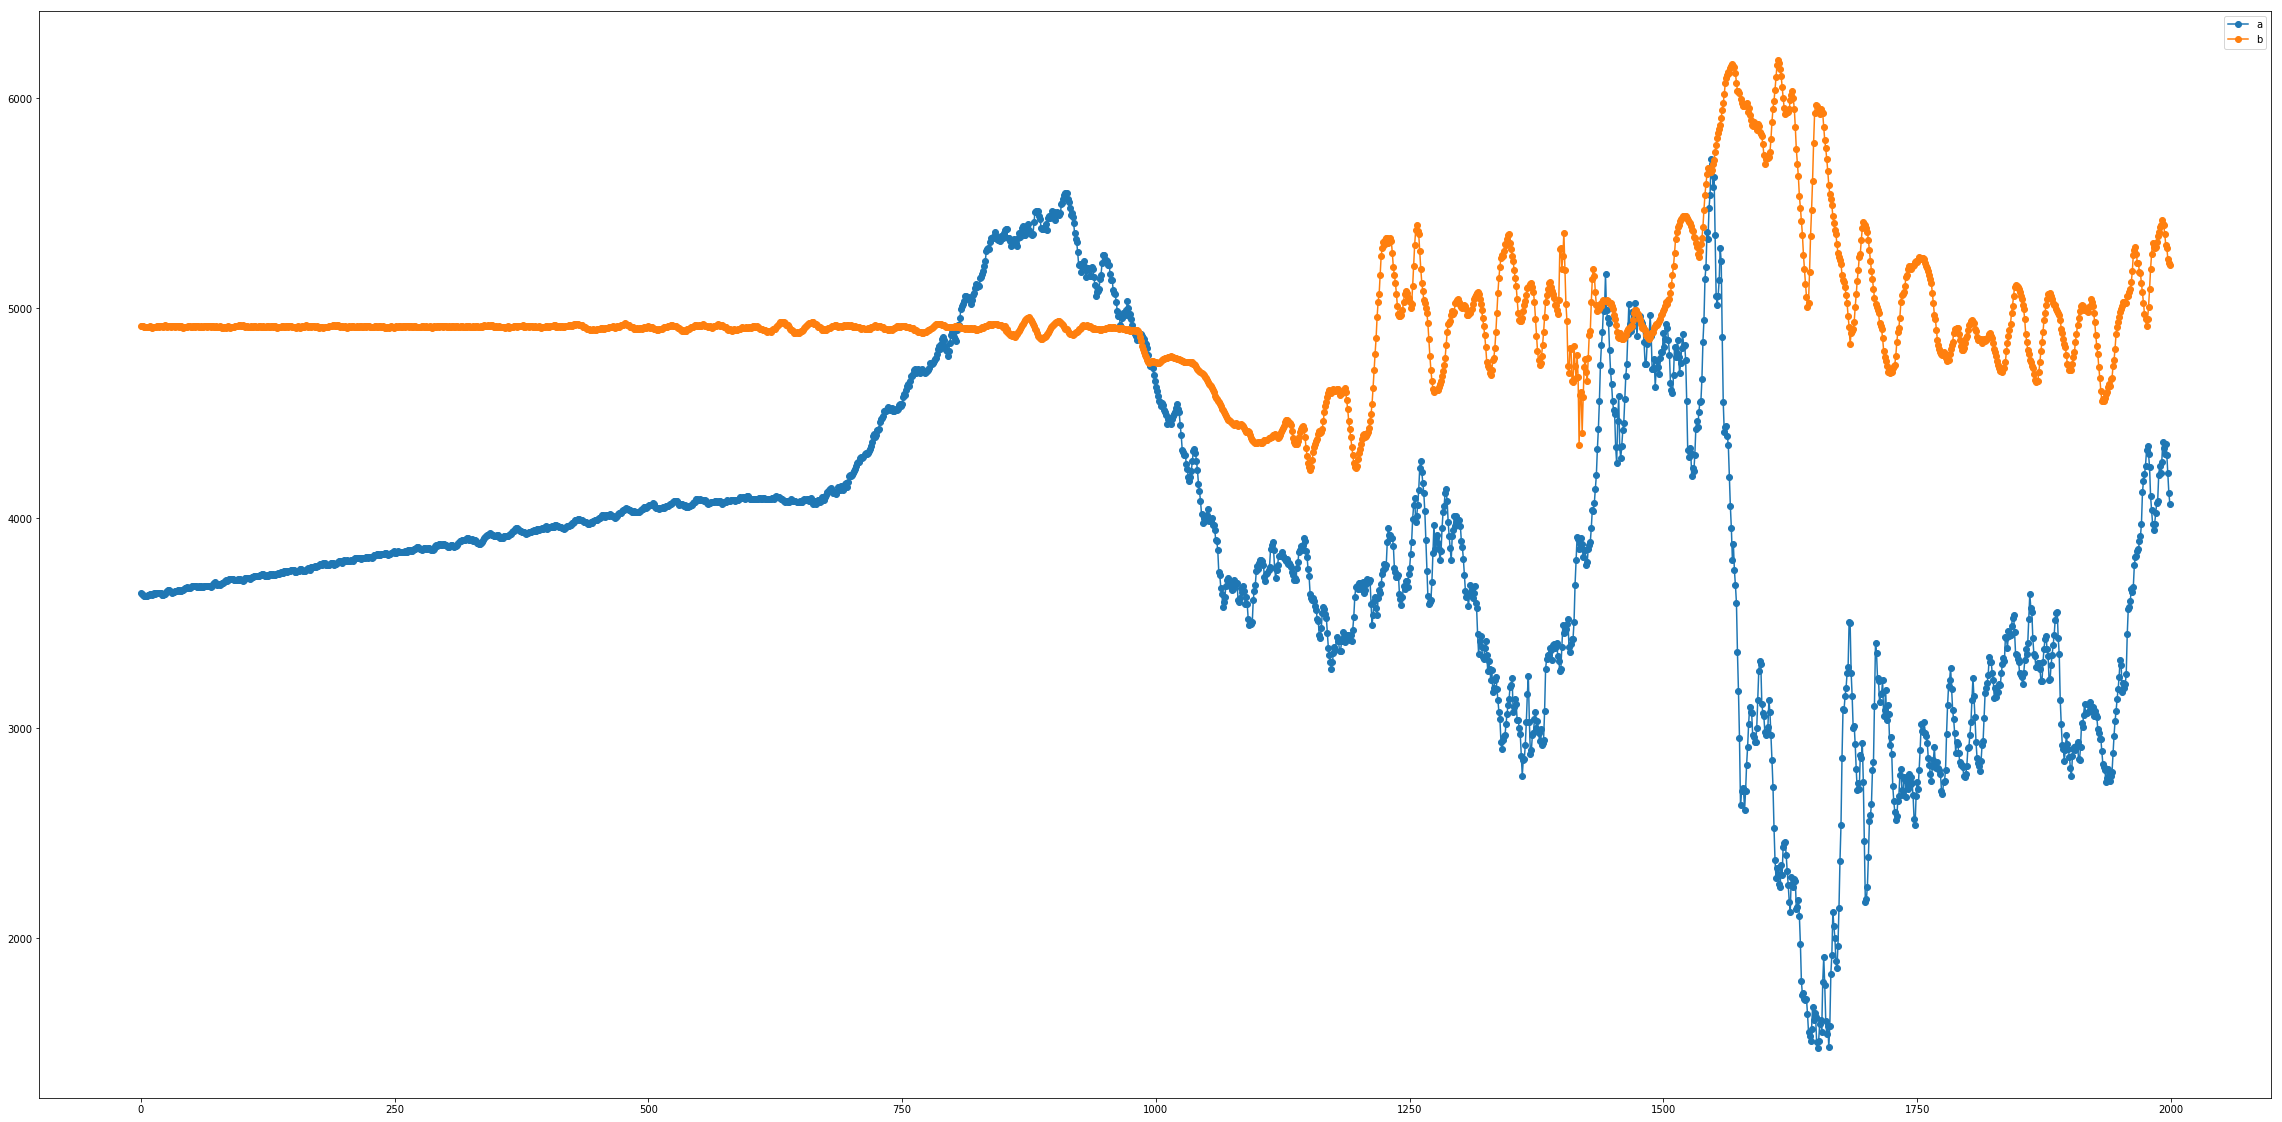

In [24]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(40, 20))

#plt.plot(b.iloc[:500])
plt.plot(Y_predict[0:2000],marker='o',linestyle='solid',label='a')
plt.plot(Y_test[0:2000],marker='o',linestyle='solid',label='b')
#plt.plot(select.iloc[:500])
plt.legend(loc='upper right')
plt.show()

In [18]:
X_test.shape

(790877, 50, 42)